In [17]:
import ROOT
import matplotlib.pyplot as plt
from CollectMaPSAs import *
import cPickle

In [2]:
plt.rc('font', size=18, weight='bold', family='sans-serif')
plt.rc('axes', titlesize=18)#, labelsize=18)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=18)
plt.rc('figure', titlesize=18)

In [3]:
df_regular = pd.read_csv('HPK-v1-round2/allpix.csv')

df_red1 = pd.read_csv('HPK-v1-redclean-round2/allpix.csv')
df_red2 = pd.read_csv('HPK-v1-redclean-round3/allpix.csv')

df_reduced = pd.concat([df_red1,df_red2])

outdir = 'redclean'

In [4]:
def pixel_overlay(var1, xtitle, bins):

    arr1 = np.clip(df_regular[var1],bins[0],bins[-1])
    arr2 = np.clip(df_reduced[var1],bins[0],bins[-1])

    mu1 = np.mean(arr1)
    sigma1 = np.std(arr1)
    mu2 = np.mean(arr2)
    sigma2 = np.std(arr2)
    
    fig1 = plt.figure(figsize=(8,6))
    plt.hist(arr1,bins=bins,histtype='step',color='black',label='regular clean',density=True)
    plt.hist(arr2,bins=bins,histtype='step',color='red',label='reduced clean',density=True)
    plt.xlabel(xtitle,fontweight='bold')
    plt.ylabel("Pixels [normalized]",fontweight='bold')
    #plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')
    plt.legend(frameon=False)
    
    plt.figtext(.6,.7,"$\mu$="+str(round(mu1,2))+", $\sigma$="+str(round(sigma1,2)),size=18)
    plt.figtext(.6,.62,"$\mu$="+str(round(mu2,2))+", $\sigma$="+str(round(sigma2,2)),color='red',size=18)

    plt.tight_layout()

    fig1.savefig(outdir+"/overlay_"+var1+".png",bbox_inches='tight')
    fig1.savefig(outdir+"/overlay_"+var1+".pdf",bbox_inches='tight')

    #plt.yscale('log')
    #plt.ylim([0.1,50*npix])

    fig1.savefig(outdir+"/overlay_"+var1+"_log.png",bbox_inches='tight')
    fig1.savefig(outdir+"/overlay_"+var1+"_log.pdf",bbox_inches='tight')

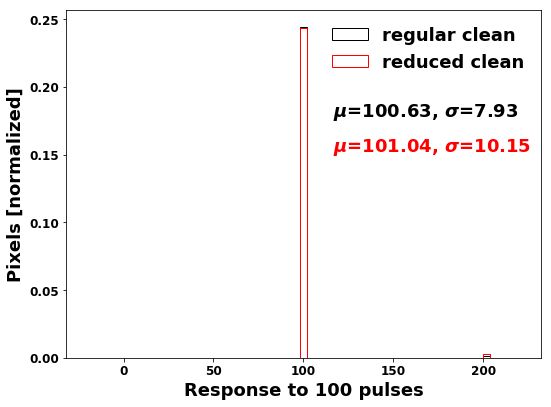

In [5]:
pixel_overlay("pa","Response to 100 pulses",np.linspace(-20,220,60))

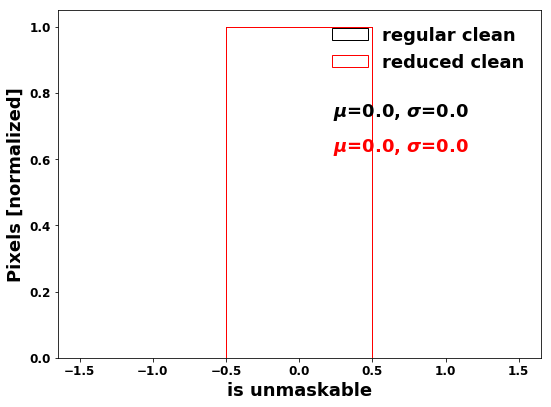

In [6]:
pixel_overlay("mask","is unmaskable",np.linspace(-1.5,1.5,4))

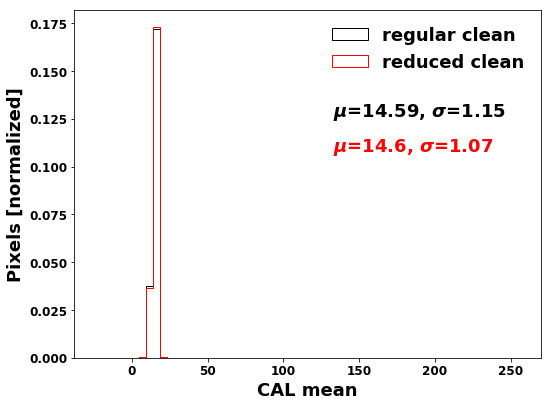

In [7]:
pixel_overlay("CAL_Mean","CAL mean",np.linspace(-24,256,60))

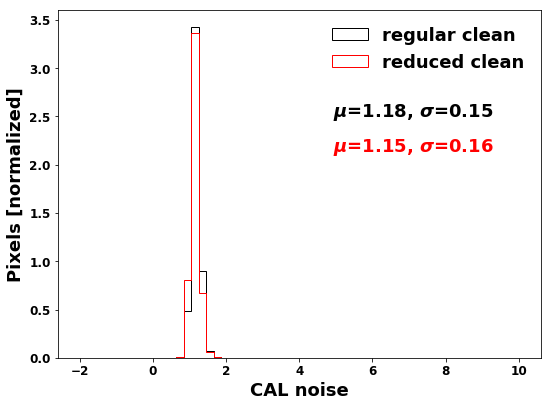

In [8]:
pixel_overlay("CAL_RMS","CAL noise",np.linspace(-2,10,60))   

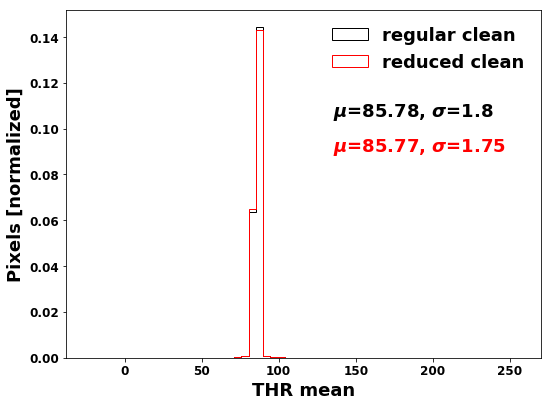

In [9]:
pixel_overlay("THR_Mean","THR mean",np.linspace(-24,256,60))

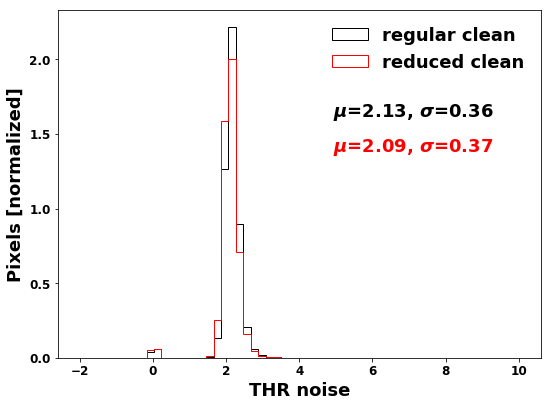

In [10]:
pixel_overlay("THR_RMS","THR noise",np.linspace(-2,10,60))

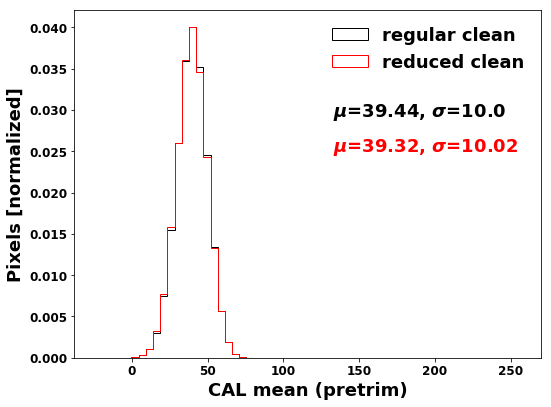

In [11]:
pixel_overlay("CAL_Mean_pretrim","CAL mean (pretrim)",np.linspace(-24,256,60))

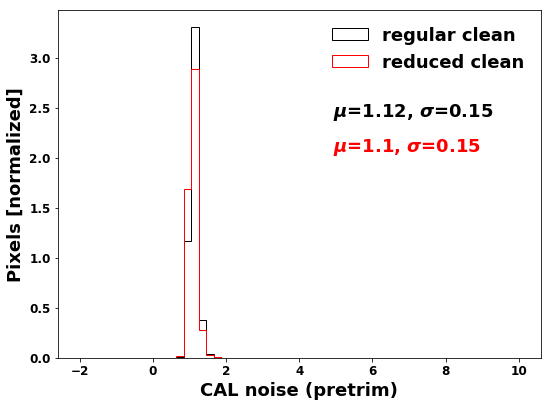

In [12]:
pixel_overlay("CAL_RMS_pretrim","CAL noise (pretrim)",np.linspace(-2,10,60))

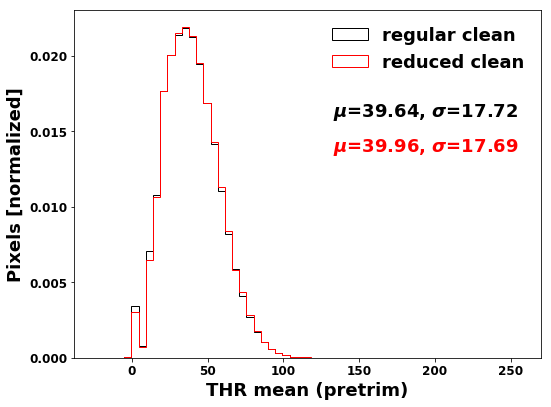

In [13]:
pixel_overlay("THR_Mean_pretrim","THR mean (pretrim)",np.linspace(-24,256,60))

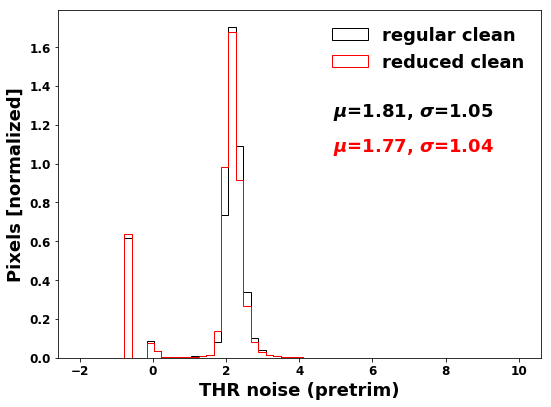

In [14]:
pixel_overlay("THR_RMS_pretrim","THR noise (pretrim)",np.linspace(-2,10,60))

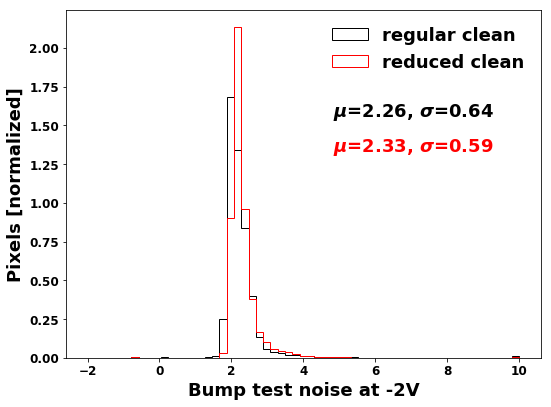

In [15]:
pixel_overlay("Bump_RMS","Bump test noise at -2V",np.linspace(-2,10,60))

In [18]:
vendor = "HPK"

redclean = []
mapsa_names = []

# regular clean
with open("hpk-v1-round2.txt") as f:
    reader = csv.reader(f,delimiter=' ')
    mapsa_names += [row[0] for row in reader]
    
# reduced clean
with open("hpk-v1-redclean-round3.txt") as f:
    reader = csv.reader(f,delimiter=' ')
    mapsa_info = [row for row in reader]
    mapsa_names += [row[1] for row in mapsa_info]
    redclean += [row[0] for row in mapsa_info]
    
with open("hpk-v1-redclean-round2.txt") as f:
    reader = csv.reader(f,delimiter=' ')
    mapsa_info = [row for row in reader]
    mapsa_names += [row[0] for row in mapsa_info]
    redclean += [row[0] for row in mapsa_info]
    
mapsas = []
for m in mapsa_names:
    fname = 'pickles/'+m+'.pkl'
    if os.path.isfile(fname):
        mapsa = cPickle.load(open(fname,'rb'))
        mapsas += [mapsa]
    else: 
#            mapsa = MaPSA(m)
        print("Missing pickle for ", m)

print(redclean)

['HPK_36232_004L', 'HPK_36232_005L', 'HPK36232_006L', 'HPK28_2_redclean', 'HPK42_1', 'HPK46_1']


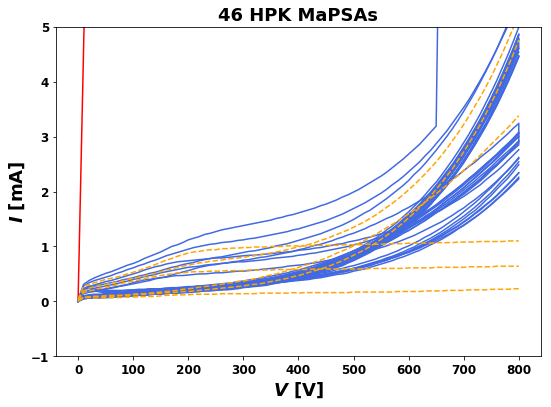

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
for m in mapsas:
    
    if m.name in redclean:
        ls = '--'
        color = 'orange'
    else:
        ls = '-' 
        color = 'royalblue'
    if m.IV["I"][60] < -10:
        color = 'red'

    ax.plot(abs(m.IV["V"]),abs(m.IV["I"]),color=color,linestyle=ls)

ax.set_xlabel("$V$ [V]",fontweight='bold')
ax.set_ylabel("$I$ [mA]",fontweight='bold')
ax.set_ylim(-1,5)
plt.title(str(len(mapsas)) + " " + vendor +" MaPSAs",fontweight='bold')

plt.tight_layout()

fig.savefig(outdir+"/IV.png",bbox_inches='tight')
fig.savefig(outdir+"/IV.pdf",bbox_inches='tight')